In [38]:
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
BASE_DIR = "../training/training_metrics"
DATASETS = ["small", "medium", "full"]

In [10]:
def load_metrics(path):
    with open(path, "rb") as f:
        return pickle.load(f)

In [42]:
all_metrics = {}
for folder in os.listdir(BASE_DIR):
    if not folder.endswith(".pkl"):
        file_path = os.path.join(BASE_DIR, folder, folder + ".pkl")
        if os.path.exists(file_path):
            all_metrics[folder] = load_metrics(file_path)

In [23]:
def plot_metric(metric_name, dataset):
    plt.figure(figsize=(10,6))
    for model_name, log in all_metrics.items():
        if f"set_{dataset}" in model_name:
            values = log["history"].get(metric_name, [])
            plt.plot(range(1, len(values)+1), values, label=model_name, linewidth=2)
    plt.title(f"{metric_name} across models ({dataset} dataset)")
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [66]:
final_results = []
for model_name, log in all_metrics.items():
    history = log["history"]
    
    final_results.append({
        "model": model_name,
        "train_time_sec": log["total_training_time_seconds"],
        "gpu_mem_avg": 1.0 * sum(l['gpu_memory_used_mb'] for l in log["gpu_memory_log"]) / len(log["gpu_memory_log"]) if log["gpu_memory_log"] else 0,
        "avg_epoch_time": sum(l["time_seconds"] for l in log["epoch_times"]) / len(log["epoch_times"])
    })

df_results = pd.DataFrame(final_results)

In [40]:
print("\n=== GPU Usage (avg MB) ===")
print(df_results[["model", "gpu_mem_avg"]].sort_values("gpu_mem_avg"))


=== GPU Usage (avg MB) ===
                                model  gpu_mem_avg
18        head_fine_tuning_set_medium        435.0
4           head_fine_tuning_set_full        435.0
5          head_fine_tuning_set_small        435.0
19         lora_r_4_alpha_2_set_small        437.0
11        lora_r_4_alpha_2_set_medium        438.0
10          lora_r_4_alpha_2_set_full        439.0
0        lora_r_32_alpha_16_set_small        873.0
13      lora_r_32_alpha_16_set_medium        882.0
6         lora_r_32_alpha_16_set_full        891.0
15       lora_r_32_alpha_64_set_small        900.0
9       lora_r_32_alpha_64_set_medium        909.0
16        lora_r_32_alpha_64_set_full        918.0
12    adapters_inner_dim_128_set_full        925.0
7    adapters_inner_dim_128_set_small       1380.0
8   adapters_inner_dim_128_set_medium       1380.0
3      adapters_inner_dim_64_set_full       1380.0
17   adapters_inner_dim_64_set_medium       1380.0
20    adapters_inner_dim_64_set_small       1380.0
1  

In [41]:
print("\n=== Total Training Time (s) ===")
print(df_results[["model", "train_time_sec"]].sort_values("train_time_sec"))


=== Total Training Time (s) ===
                                model  train_time_sec
0        lora_r_32_alpha_16_set_small       25.803747
19         lora_r_4_alpha_2_set_small       26.518577
15       lora_r_32_alpha_64_set_small       29.411865
7    adapters_inner_dim_128_set_small       31.753754
5          head_fine_tuning_set_small       31.961169
14         full_fine_tuning_set_small       32.312189
20    adapters_inner_dim_64_set_small       37.406768
18        head_fine_tuning_set_medium       81.652761
13      lora_r_32_alpha_16_set_medium      176.397633
11        lora_r_4_alpha_2_set_medium      180.649604
9       lora_r_32_alpha_64_set_medium      197.560807
8   adapters_inner_dim_128_set_medium      210.903934
2         full_fine_tuning_set_medium      212.765382
17   adapters_inner_dim_64_set_medium      215.430031
4           head_fine_tuning_set_full      999.372772
10          lora_r_4_alpha_2_set_full     2106.324042
6         lora_r_32_alpha_16_set_full     2197.98

In [67]:
print("\n=== Average Epoch Training Time (s) ===")
print(df_results[["model", "avg_epoch_time"]].sort_values("avg_epoch_time"))


=== Average Epoch Training Time (s) ===
                                model  avg_epoch_time
0        lora_r_32_alpha_16_set_small        1.719273
19         lora_r_4_alpha_2_set_small        1.767105
15       lora_r_32_alpha_64_set_small        1.959895
7    adapters_inner_dim_128_set_small        2.116165
5          head_fine_tuning_set_small        2.130032
14         full_fine_tuning_set_small        2.153001
20    adapters_inner_dim_64_set_small        2.492822
18        head_fine_tuning_set_medium        8.164224
13      lora_r_32_alpha_16_set_medium       17.639022
11        lora_r_4_alpha_2_set_medium       18.064261
9       lora_r_32_alpha_64_set_medium       19.755480
8   adapters_inner_dim_128_set_medium       21.089496
2         full_fine_tuning_set_medium       21.275569
17   adapters_inner_dim_64_set_medium       21.541903
4           head_fine_tuning_set_full      199.873448
10          lora_r_4_alpha_2_set_full      421.263463
6         lora_r_32_alpha_16_set_full    

In [47]:
def plot_overfitting(dataset, model_prefix):
    plt.figure(figsize=(10,6))
    for model_name, log in [metric for metric in all_metrics.items() if metric[0].startswith(model_prefix)]:
        if f"set_{dataset}" in model_name:
            train_loss = log["history"]["train_loss"]
            val_loss = log["history"]["val_loss"]
            plt.plot(range(1, len(train_loss)+1), train_loss, "--", label=f"{model_name} train")
            plt.plot(range(1, len(val_loss)+1), val_loss, label=f"{model_name} val")
    plt.title(f"Train vs Validation Loss ({dataset} dataset)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

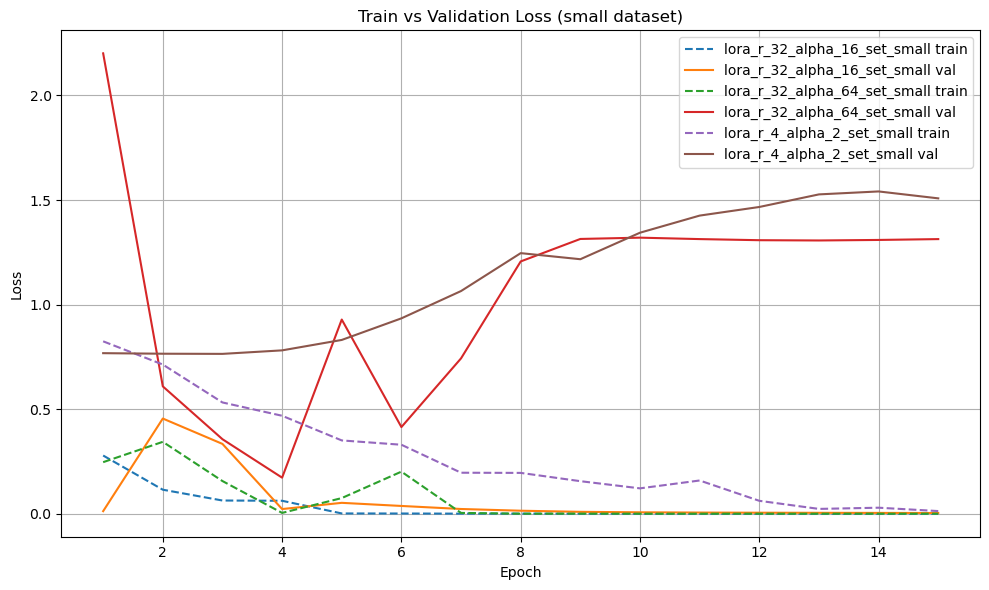

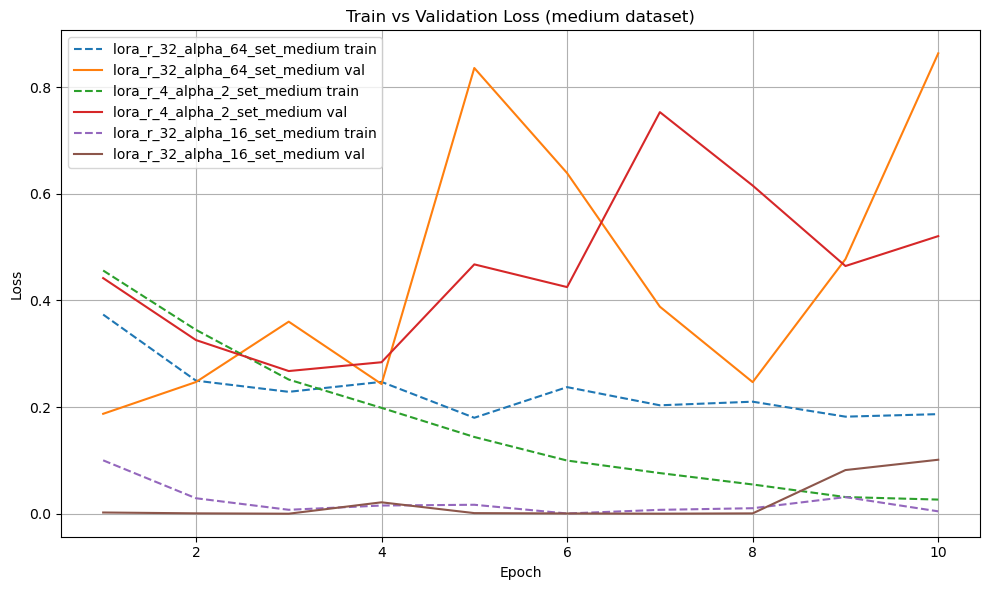

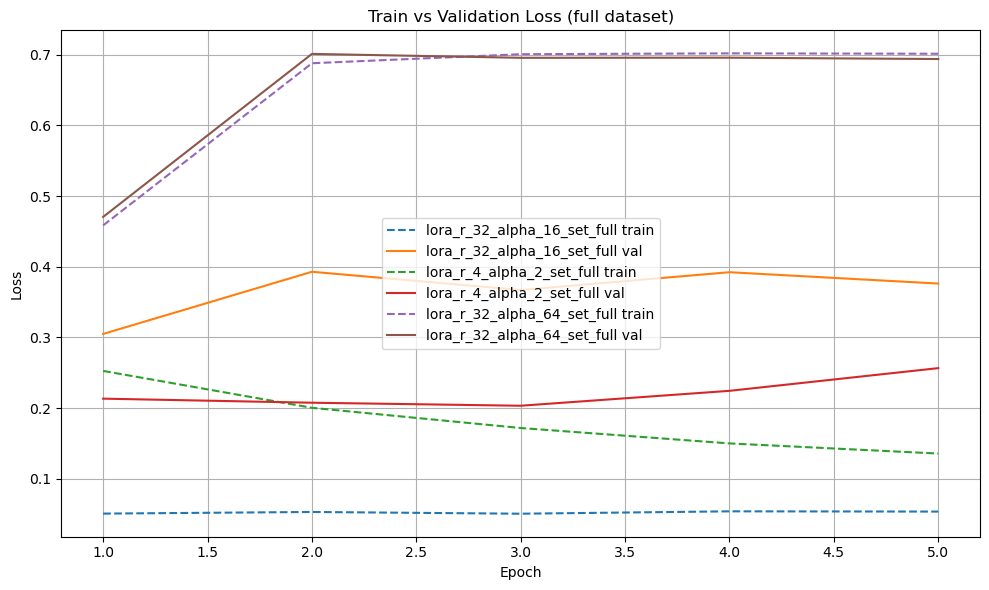

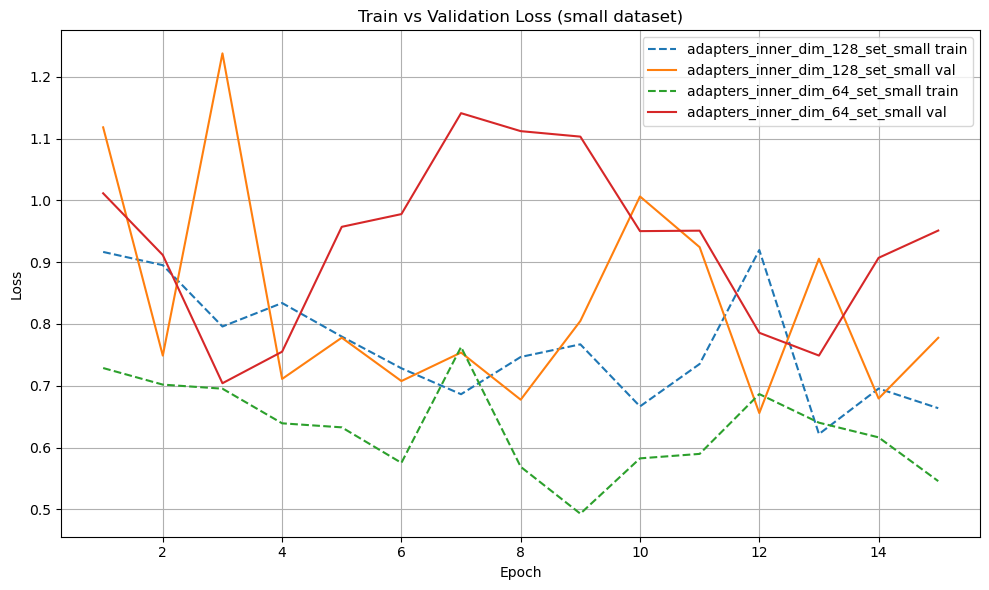

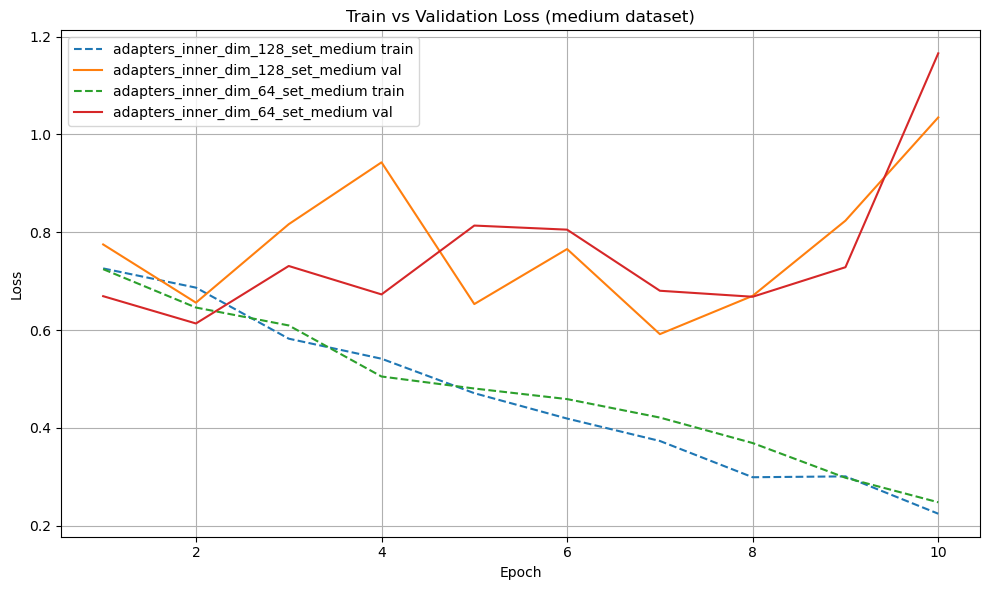

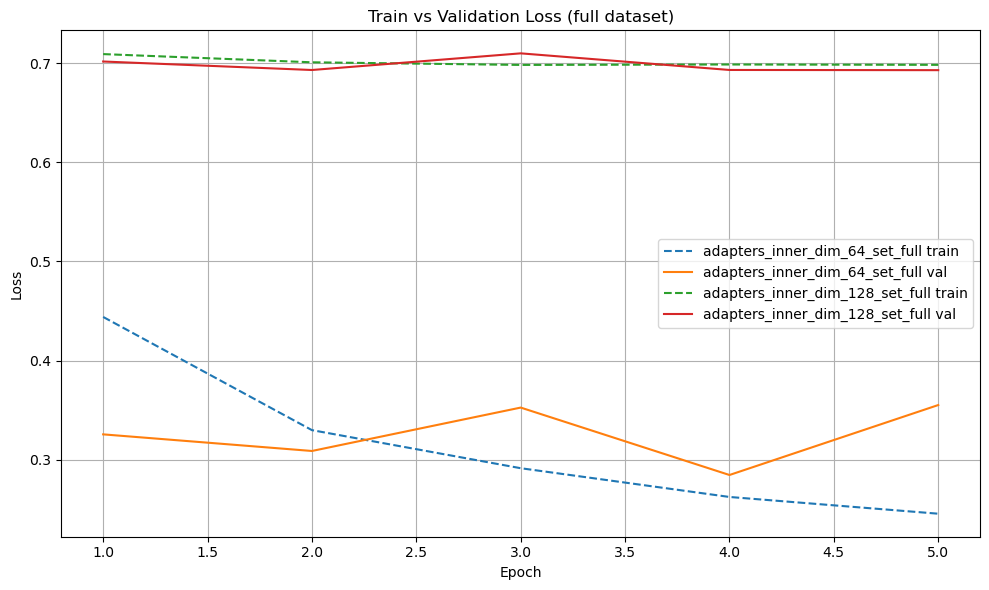

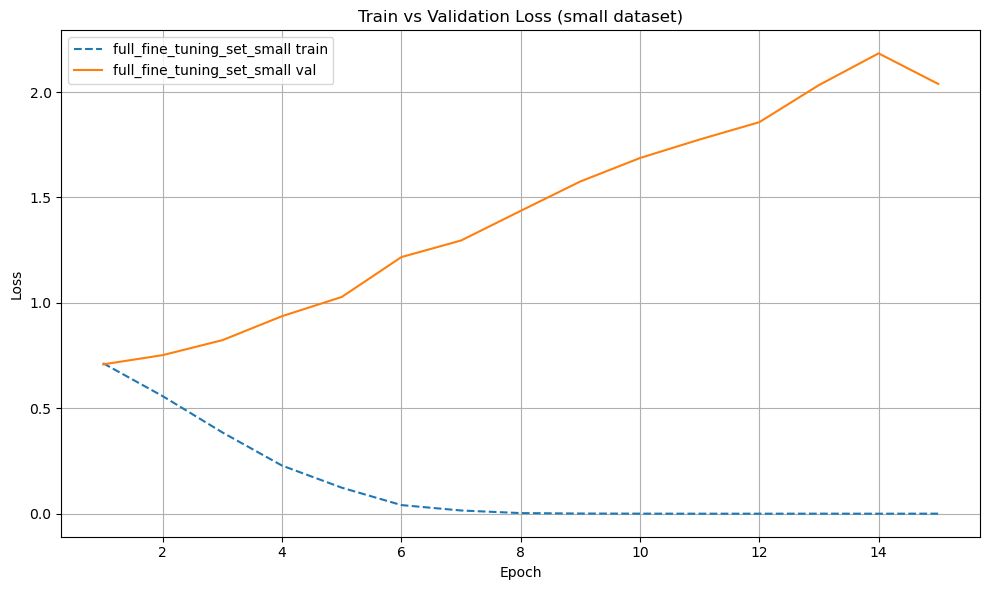

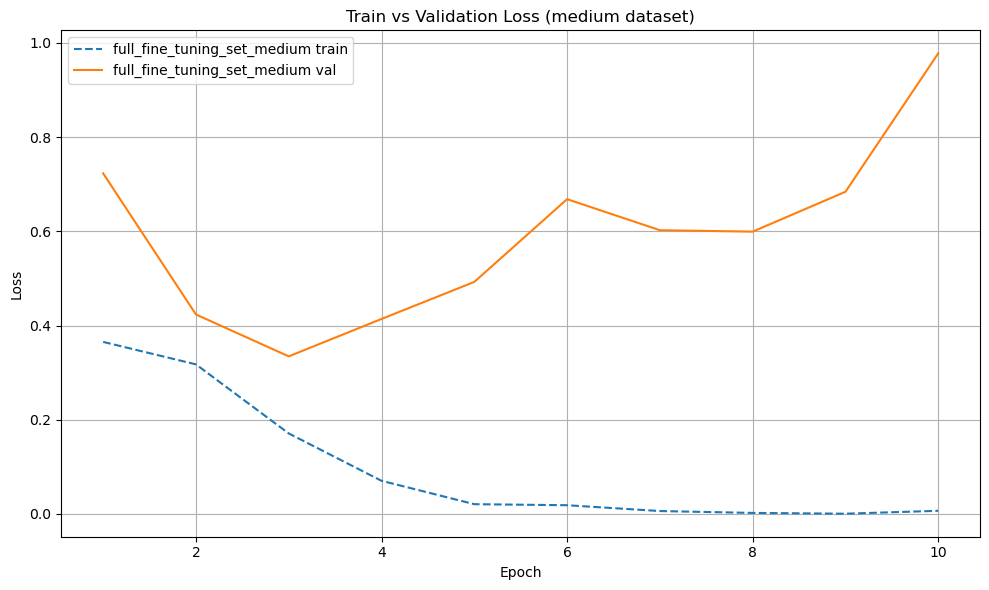

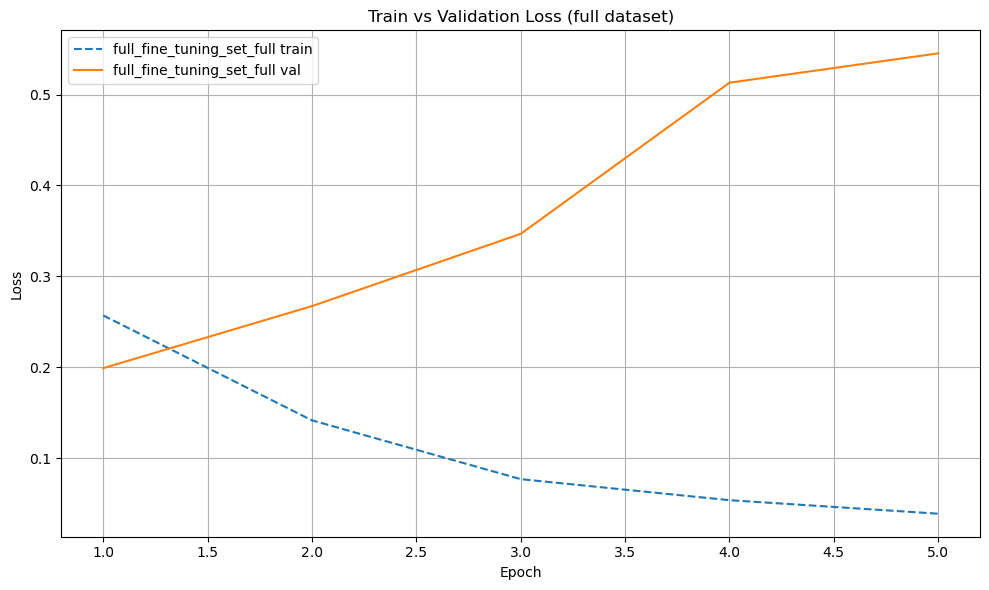

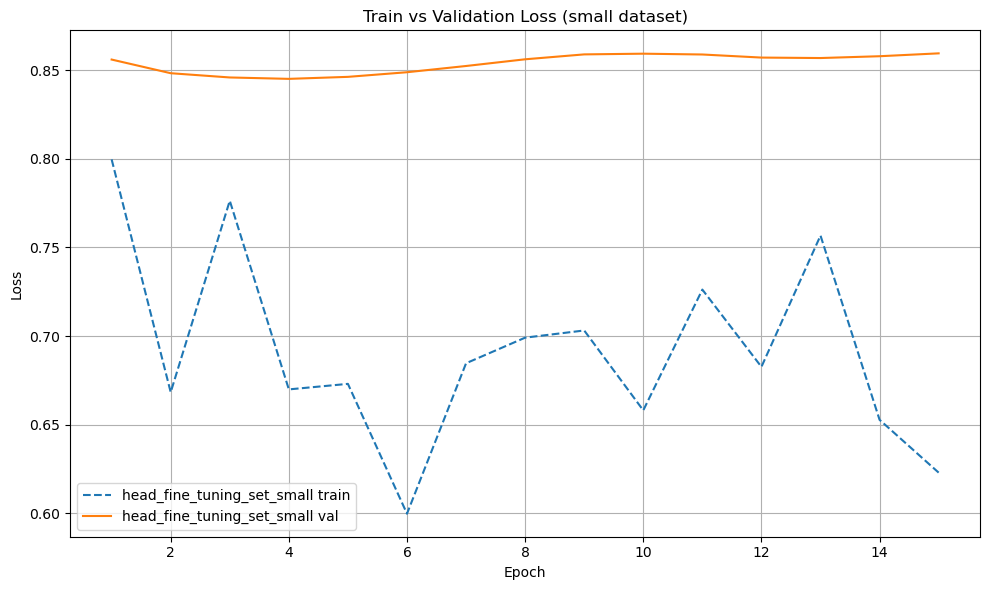

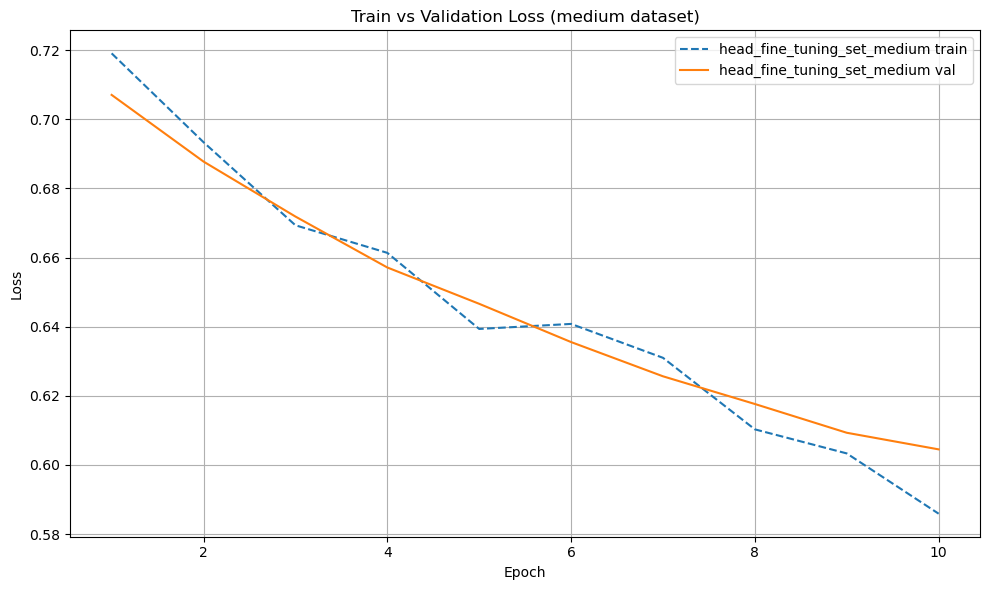

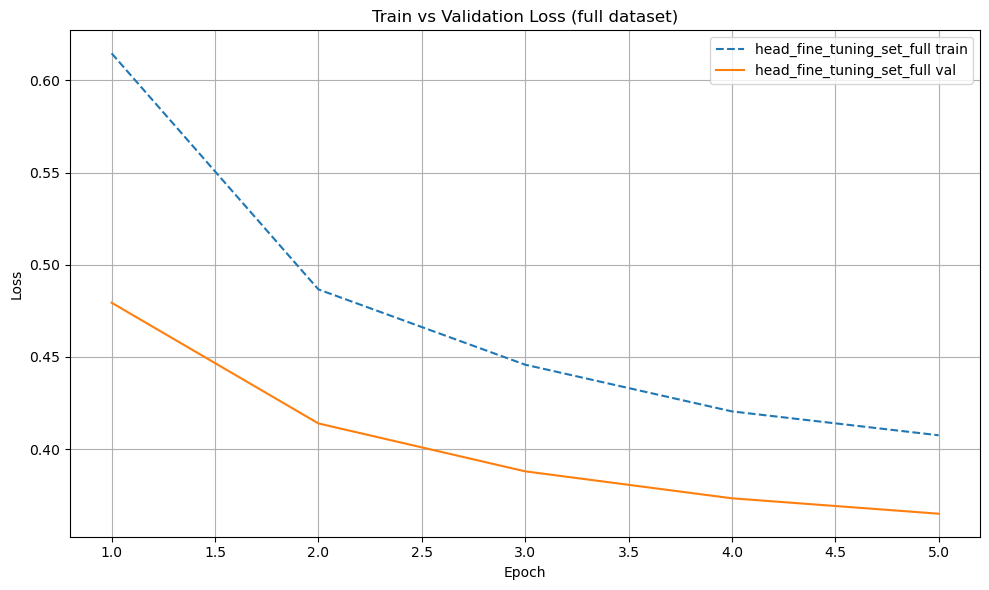

In [49]:
for model_prefix in ['lora', 'adapters', 'full', 'head']:
    for dataset in DATASETS:
        plot_overfitting(dataset, model_prefix)

In [62]:
class TrainingEvaluator:
    def __init__(self, filepath):
        """
        Loads training history and logs from a .pkl file.
        """
        if not os.path.exists(filepath):
            raise FileNotFoundError(f"No such file: {filepath}")

        with open(filepath, 'rb') as f:
            data = pickle.load(f)

        self.history = data.get('history', {})
        self.gpu_memory_log = data.get('gpu_memory_log', [])
        self.epoch_times = data.get('epoch_times', [])
        self.total_time = data.get('total_training_time_seconds', None)

    def plot_metric(self, metric):
        """
        Plots a given training/validation metric.
        """
        if metric not in self.history:
            print(f"Metric '{metric}' not found in training history.")
            return

        plt.plot(self.history[metric], label=f'Train {metric}')
        val_key = f'val_{metric}'
        if val_key in self.history:
            plt.plot(self.history[val_key], label=f'Validation {metric}')

        plt.title(f"{metric.capitalize()} Over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_all_metrics(self):
        """
        Plots all available metrics in training history.
        """
        for metric in self.history.keys():
            if not metric.startswith('val_'):  # plot each metric once
                self.plot_metric(metric)

    def plot_gpu_memory_usage(self):
        """
        Plots GPU memory usage per epoch.
        """
        if not self.gpu_memory_log:
            print("No GPU memory log available.")
            return

        epochs = [x["epoch"] for x in self.gpu_memory_log]
        mem_mb = [x["gpu_memory_used_mb"] for x in self.gpu_memory_log]

        plt.plot(epochs, mem_mb, marker='o')
        plt.title("GPU Memory Usage per Epoch (MB)")
        plt.xlabel("Epoch")
        plt.ylabel("Memory (MB)")
        plt.grid(True)
        plt.show()

    def plot_epoch_times(self):
        """
        Plots the duration of each training epoch.
        """
        if not self.epoch_times:
            print("No epoch time data available.")
            return

        epochs = [x["epoch"] for x in self.epoch_times]
        times = [x["time_seconds"] for x in self.epoch_times]

        plt.plot(epochs, times, marker='o')
        plt.title("Epoch Training Time (Seconds)")
        plt.xlabel("Epoch")
        plt.ylabel("Time (s)")
        plt.grid(True)
        plt.show()
            
    def summary(self):
        """
        Prints a basic summary.
        """
        print("=== Training Summary ===")
        print(f"Tracked metrics: {list(self.history.keys())}")
        if self.total_time:
            mins = round(self.total_time / 60, 2)
            print(f"Total training time: {mins} minutes")
        if self.gpu_memory_log:
            print(f"Max GPU memory used: {max(self.gpu_memory_log, key=lambda x: x['gpu_memory_used_mb'])} MB")
        if self.epoch_times:
            avg_time = sum(t["time_seconds"] for t in self.epoch_times) / len(self.epoch_times)
            print(f"Average epoch time: {avg_time:.2f} seconds")
        print("========================")
        
    def save_plot(self, plt_obj, filename, directory="plots"):
        os.makedirs(directory, exist_ok=True)
        filepath = os.path.join(directory, filename)
        plt_obj.savefig(filepath)
        print(f"Plot saved: {filepath}")

In [63]:
evaluator = TrainingEvaluator('../training/training_metrics/full_fine_tuning_set_small/full_fine_tuning_set_small.pkl')

In [64]:
evaluator.summary()

=== Training Summary ===
Tracked metrics: ['train_loss', 'val_loss', 'val_accuracy', 'val_f1']
Total training time: 0.54 minutes
Max GPU memory used: {'epoch': 1, 'gpu_memory_used_mb': 1702} MB
Average epoch time: 2.15 seconds
